In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
MU_EARTH = 3.986004418 * 10**14  # m^3/s^2gravitational parameter
R_EARTH = 6371000  # m, Earth's mean radius
LEO_ALTITUDE = 700000  # m, altitude of LEO where Vega C can take 750kg
R_LEO = R_EARTH + LEO_ALTITUDE  # radius of Low Earth Orbit
R_APOPHIS = 1.4714 * 10**11  # m, semi-major axis of Apophis's orbit
G0 = 9.81  # m/s^2, acceleration due to gravity
OMEGA_EARTH = 7.2921159 * 10**-5  # rad/s, rotational speed of Earth
LATITUDE = 5.2  # degrees, latitude of the Guiana Space Centre

launch_vehicle_costs = {
    'Falcon 9': 62,  # in millions of dollars
    'Ariane 6': 90,  # in millions of dollars for Ariane 62 variant
    'Vega C': 35,  # in millions of dollars
}


# Falcon 9
falcon9 = {
    'First Stage': {
        'Propellant': 'LOX/RP-1',
        'Thrust': 7607,  # kN
        'Mass (propellant)': 411,  # tons
        'Dry Mass': 28,  # tons, estimated as 10% of propellant mass
        'Burn Time': 162,  # seconds
    },
    'Second Stage': {
        'Propellant': 'LOX/RP-2',
        'Thrust': 934,  # kN
        'Mass (propellant)': 78,  # tons
        'Dry Mass': 9,  # tons, estimated as 10% of propellant mass
        'Burn Time': 397,  # seconds
    },
}

# Ariane 6-2
ariane6 = {
    'Solid Rocket Boosters P120C': {
        'Propellant': 'Solid',
        'Thrust': 4500,  # kN each
        'Mass (propellant)': 142,  # tons each
        'Dry Mass': 14.2,  # tons each, estimated as 10% of propellant mass
        'Burn Time': 135,  # seconds
    },
    'Core Stage - Vulcain 2.1': {
        'Propellant': 'LOX/LH2',
        'Thrust': 960,  # kN
        'Mass (propellant)': 175,  # tons
        'Dry Mass': 17.5,  # tons, estimated as 10% of propellant mass
        'Burn Time': 540,  # seconds
    },
    'Upper Stage - Vinci': {
        'Propellant': 'LOX/LH2',
        'Thrust': 180,  # kN
        'Mass (propellant)': 26.5,  # tons
        'Dry Mass': 2.65,  # tons, estimated as 10% of propellant mass
        'Burn Time': 'Variable',  # seconds, it is restartable
    },
}

vega_c = {
    'First Stage - P120C': {
        'Propellant': 'Solid',
        'Thrust': 4500,  # kN
        'Mass (propellant)': 143.6,  # tons
        'Dry Mass': 14.1,  # tons, estimated as 10% of propellant mass
        'Burn Time': 135,  # seconds
    },
    'Second Stage - Zefiro 40': {
        'Propellant': 'Solid',
        'Thrust': 1304,  # kN
        'Mass (propellant)': 40,  # tons
        'Dry Mass': 4,  # tons, estimated as 10% of propellant mass
        'Burn Time': 77,  # seconds
    },
    'Third Stage - Zefiro 9': {
        'Propellant': 'Solid',
        'Thrust': 305,  # kN
        'Mass (propellant)': 10,  # tons
        'Dry Mass': 1,  # tons, estimated as 10% of propellant mass
        'Burn Time': 120,  # seconds
    },
    'Fourth Stage - AVUM+': {
        'Propellant': 'UDMH / N2O4',
        'Thrust': 2.42,  # kN
        'Mass (propellant)': 0.74,  # tons
        'Dry Mass': 0.074,  # tons, estimated as 10% of propellant mass
        'Burn Time': 600,  # seconds, it is restartable
    },
    
}

Skyrora_XL = {
'First Stage - 9 x Skyforce': {
'Propellant': 'HTP / KEROSENE',
'Thrust': 797, # kN
'Mass (propellant)': 30, # tons, estimated
'Dry Mass': 3, # tons, estimated
'Burn Time': 180, # seconds, estimated
},
'Second Stage - 1 x Skyforce': {
'Propellant': 'HTP / KEROSENE',
'Thrust': 85, # kN
'Mass (propellant)': 10, # tons, estimated
'Dry Mass': 1, # tons, estimated
'Burn Time': 180, # seconds, estimated
},
'Third Stage - 1 x LEO': {
'Propellant': 'HTP / KEROSENE',
'Thrust': 3.5, # kN
'Mass (propellant)': 2, # tons, estimated
'Dry Mass': 0.2, # tons, estimated
'Burn Time': 600, # seconds, estimated
},}



In [2]:
def hohmann_delta_v(r1, r2):
    """
    Compute the delta-v for a Hohmann transfer.
    r1: radius of initial circular orbit
    r2: radius of final circular orbit
    """
    term1 = math.sqrt(MU_EARTH / r1)
    term2 = math.sqrt(2 * r2 / (r1 + r2)) - 1
    return term1 * term2


In [3]:
import math

# Constants
mu_sun = 132712e6  # km^3 s^-2
G0 = 9.81  # m/s^2, gravitational acceleration at Earth's surface
ISP = 300  # s, specific impulse of the engine
M0 = 800  # kg, initial mass of the spacecraft (including propellant)
MF = 350  # kg, final mass of the spacecraft (after propellant is burned)

# Orbital parameters for Earth
ecc_earth = 0.0167
a_earth = 149.6e6  # km
r_earth_perihelion = 147.095e6  # km
r_earth_aphelion = 152.1e6  # km
inc_earth = 0  # deg (Earth's orbit of the sun, not its orientation)

# Orbital parameters for Didymos
ecc_didymos = 0.383264789
a_didymos = 1.642665059e8  # km
r_didymos_perihelion = a_didymos * (1 - ecc_didymos)  # km
r_didymos_aphelion = a_didymos * (1 + ecc_didymos)  # km
inc_didymos = 3.41415073  # deg

# Function to calculate velocity given distance and semi-major axis
def velocity(r, a):
    return math.sqrt((2 * mu_sun / r) - (mu_sun / a))

# Velocities of Earth and Didymos at perihelion and aphelion
v_earth_peri = velocity(r_earth_perihelion, a_earth)
v_earth_aph = velocity(r_earth_aphelion, a_earth)
v_didymos_peri = velocity(r_didymos_perihelion, a_didymos)
v_didymos_aph = velocity(r_didymos_aphelion, a_didymos)

# Semi-major axis and velocities for the transfer orbit
a_transfer = (r_earth_perihelion + r_didymos_aphelion) / 2
v_transfer_peri = velocity(r_earth_perihelion, a_transfer)
v_transfer_aph = velocity(r_didymos_aphelion, a_transfer)

# Delta-v for the two burns (in km/s)
dv1 = abs(v_transfer_peri - v_earth_peri)  # at perihelion
dv2 = abs(v_didymos_aph - v_transfer_aph)  # at aphelion

# Delta-v for plane change at aphelion (in km/s)
dv_theta = 2 * v_didymos_aph * math.sin(math.radians(0.5 * inc_didymos))

# Total delta-v required for the transfer (in km/s)
total_dv_didy = dv1 + dv2 + dv_theta

# Maximum delta-v achievable by the spacecraft (in km/s)
ve = ISP * G0 / 1000  # Effective exhaust velocity in km/s
delta_v_max_didy = ve * math.log(M0 / MF)  # The Rocket Equation

# Print the results
print(f"Delta-v for burn 1: {dv1:.3f} km/s")
print(f"Delta-v for burn 2: {dv2:.3f} km/s")
print(f"Delta-v for plane change: {dv_theta:.3f} km/s")
print(f"Total delta-v required to get to didymos: {total_dv_didy:.3f} km/s")
print(f"Maximum delta-v achievable: {delta_v_max_didy:.3f} km/s")

# Check if the spacecraft can perform the transfer
if delta_v_max_didy >= total_dv_didy:
    print("The spacecraft can perform the transfer to didymos.")
else:
    print("The spacecraft cannot perform the transfer to didymos.")

Delta-v for burn 1: 2.809 km/s
Delta-v for burn 2: 2.446 km/s
Delta-v for plane change: 1.131 km/s
Total delta-v required to get to didymos: 6.385 km/s
Maximum delta-v achievable: 2.433 km/s
The spacecraft cannot perform the transfer to didymos.


In [4]:
import math
# Constants
mu_sun = 132712e6  # km^3 s^-2
G0 = 9.81  # m/s^2, gravitational acceleration at Earth's surface
ISP = 300  # s, specific impulse of the engine
M0 = 650  # kg, initial mass of the spacecraft (including propellant)
MF = 400  # kg, final mass of the spacecraft (after propellant is burned)

# Orbital parameters for Earth
ecc_earth = 0.0167
a_earth = 149.6e6  # km
r_earth_perihelion = 147.095e6  # km
r_earth_aphelion = 152.1e6  # km
inc_earth = 0  # deg (Earth's orbit of the sun, not its orientation)

# Orbital parameters for Apophis
ecc_apophis = 0.191
a_apophis = 0.92239e8  
r_apophis_perihelion = a_apophis * (1 - ecc_apophis) 
r_apophis_aphelion = a_apophis * (1 + ecc_apophis) 
inc_apophis = 3.3319  

# Function to calculate velocity given distance and semi-major axis
def velocity(r, a):
    return math.sqrt((2 * mu_sun / r) - (mu_sun / a))

# Velocities of Earth and Apophis at perihelion and aphelion add velocity at nodes
v_earth_peri = velocity(r_earth_perihelion, a_earth)
v_earth_aph = velocity(r_earth_aphelion, a_earth)
v_apophis_peri = velocity(r_apophis_perihelion, a_apophis)
v_apophis_aph = velocity(r_apophis_aphelion, a_apophis)

# Semi-major axis and velocities for the transfer orbit
a_transfer = (r_earth_perihelion + r_apophis_aphelion) / 2
v_transfer_peri = velocity(r_earth_perihelion, a_transfer)
v_transfer_aph = velocity(r_apophis_aphelion, a_transfer)

# Delta-v for the two burns (in km/s)
dv1 = abs(v_transfer_peri - v_earth_peri)  # at perihelion
dv2 = abs(v_apophis_aph - v_transfer_aph)  # at aphelion

# Delta-v for plane change at aphelion here we should add at perihelion as well as for at earth and at the node
dv_theta = 2 * v_apophis_aph * math.sin(math.radians(0.5 * inc_apophis))

total_dv_apop = dv1 + dv2 + dv_theta

# Maximum delta-v achievable by the spacecraft (in km/s)
ve = ISP * G0 / 1000  # Effective exhaust velocity in km/s
delta_v_max_apop = ve * math.log(M0 / MF)  # The Rocket Equation

# Print the results
print(f"Delta-v for burn 1: {dv1:.3f} km/s")
print(f"Delta-v for burn 2: {dv2:.3f} km/s")
print(f"Delta-v for plane change: {dv_theta:.3f} km/s")
print(f"Total delta-v required to get to Apophis: {total_dv_apop:.3f} km/s")
print(f"Maximum delta-v achievable: {delta_v_max_apop:.3f} km/s")

# Check if the spacecraft can perform the transfer
if delta_v_max_apop >= total_dv_apop:
    print("The spacecraft can perform the transfer to get to Apophis.")
else:
    print("The spacecraft cannot perform the transfer to get to Apophis.")

Delta-v for burn 1: 2.512 km/s
Delta-v for burn 2: 5.928 km/s
Delta-v for plane change: 1.818 km/s
Total delta-v required to get to Apophis: 10.258 km/s
Maximum delta-v achievable: 1.429 km/s
The spacecraft cannot perform the transfer to get to Apophis.


In [5]:
import math

# Constants
mu_sun = 132712e6  # km^3 s^-2
G0 = 9.81  # m/s^2, gravitational acceleration at Earth's surface
ISP = 300  # s, specific impulse of the engine
M0 = 750  # kg, initial mass of the spacecraft (including propellant)
MF = 500  # kg, final mass of the spacecraft (after propellant is burned)

# Function to calculate velocity given distance and semi-major axis
def velocity(r, a):
    return math.sqrt((2 * mu_sun / r) - (mu_sun / a))

# Function to calculate the period of an orbit
def period(a):
    return 2 * math.pi * math.sqrt(a**3 / mu_sun)

# Function to calculate plane change
def plane_change(v, inc):
    return 2 * v * math.sin(math.radians(0.5 * inc))

# Orbital parameters for Earth
ecc_earth = 0.0167
a_earth = 149.6e6  # km
r_earth_perihelion = 147.095e6  # km
r_earth_aphelion = 152.1e6  # km
inc_earth = 0  # deg (Earth's orbit of the sun, not its orientation)

def plane_change(v, delta_i):
    return 2 * v * math.sin(math.radians(delta_i / 2))

# Change in inclination from Earth to Apophis
delta_i = abs(inc_earth - inc_apophis)

# Plane change at different points
dv_theta_earth_peri = plane_change(v_earth_peri, delta_i)
dv_theta_earth_aph = plane_change(v_earth_aph, delta_i)
dv_theta_apophis_peri = plane_change(v_apophis_peri, delta_i)
dv_theta_apophis_aph = plane_change(v_apophis_aph, delta_i)
dv_theta_transfer_peri = plane_change(v_transfer_peri, delta_i)
dv_theta_transfer_aph = plane_change(v_transfer_aph, delta_i)

# Print plane change delta-v at different points
print(f"Plane change delta-v at Earth perihelion: {dv_theta_earth_peri:.3f} km/s")
print(f"Plane change delta-v at Earth aphelion: {dv_theta_earth_aph:.3f} km/s")
print(f"Plane change delta-v at Apophis perihelion: {dv_theta_apophis_peri:.3f} km/s")
print(f"Plane change delta-v at Apophis aphelion: {dv_theta_apophis_aph:.3f} km/s")
print(f"Plane change delta-v at transfer orbit perihelion: {dv_theta_transfer_peri:.3f} km/s")
print(f"Plane change delta-v at transfer orbit aphelion: {dv_theta_transfer_aph:.3f} km/s")

# Velocities and plane change at perihelion and aphelion of Earth
v_earth_peri = velocity(r_earth_perihelion, a_earth)
v_earth_aph = velocity(r_earth_aphelion, a_earth)
delta_theta_earth_peri = plane_change(v_earth_peri, inc_earth)
delta_theta_earth_aph = plane_change(v_earth_aph, inc_earth)

# Orbital parameters for Apophis
ecc_apophis = 0.191
a_apophis = 0.92239e8  
r_apophis_perihelion = a_apophis * (1 - ecc_apophis) 
r_apophis_aphelion = a_apophis * (1 + ecc_apophis) 
inc_apophis = 3.3319  

# Velocities and plane change at perihelion and aphelion of Apophis
v_apophis_peri = velocity(r_apophis_perihelion, a_apophis)
v_apophis_aph = velocity(r_apophis_aphelion, a_apophis)
delta_theta_apophis_peri = plane_change(v_apophis_peri, inc_apophis)
delta_theta_apophis_aph = plane_change(v_apophis_aph, inc_apophis)

# Orbital parameters for the transfer orbits
# Transfer orbit 1: from Earth's perihelion to Apophis' aphelion
a_transfer1 = (r_earth_perihelion + r_apophis_aphelion) / 2
# Transfer orbit 2: from Earth's aphelion to Apophis' perihelion
a_transfer2 = (r_earth_aphelion + r_apophis_perihelion) / 2

# Velocities at nodes for the transfer orbits
v_transfer1_peri = velocity(r_earth_perihelion, a_transfer1)
v_transfer1_aph = velocity(r_apophis_aphelion, a_transfer1)
v_transfer2_peri = velocity(r_earth_aphelion, a_transfer2)
v_transfer2_aph = velocity(r_apophis_perihelion, a_transfer2)

# Delta-v for the two burns (in km/s) and plane change at nodes for Transfer Orbit 1
dv1 = abs(v_transfer1_peri - v_earth_peri)  # at perihelion
dv2 = abs(v_apophis_aph - v_transfer1_aph)  # at aphelion


# Delta-v for the other two burns (in km/s) and plane change at nodes for Transfer Orbit 2
dv3 = abs(v_transfer2_peri - v_earth_aph)  # at aphelion
dv4 = abs(v_apophis_peri - v_transfer2_aph)  # at perihelion


# Total delta-v required to get to Apophis and period of the orbits for both Transfer Orbits
total_dv1 = dv1 + dv2 
total_dv2 = dv3 + dv4
T1 = period(a_transfer1)/(60*60*24)
T2 = period(a_transfer2)/(60*60*24)

# Maximum delta-v achievable by the spacecraft (in km/s)
ve = ISP * G0 / 1000  # Effective exhaust velocity in km/s
delta_v_max = ve * math.log(M0 / MF)  # The Rocket Equation

print("\nThe Delta-V for each burns and the total for each transfer orbit:")
print(f"Transfer Orbit 1: Burn 1 Delta-V = {dv1:.3f} km/s, Burn 2 Delta-V = {dv2:.3f} km/s, Total Delta-V = {total_dv1:.3f} km/s, Period = {T1:.3f} days")
print(f"Transfer Orbit 2: Burn 1 Delta-V = {dv3:.3f} km/s, Burn 2 Delta-V = {dv4:.3f} km/s, Total Delta-V = {total_dv2:.3f} km/s, Period = {T2:.3f} days")
print(f"Maximum Delta-V achievable by the spacecraft: {delta_v_max:.3f} km/s")

# Check if the spacecraft can perform the transfers
if delta_v_max >= total_dv1:
    print("\nThe spacecraft can perform the transfer to get to Apophis using Transfer Orbit 1.")
else:
    print("\nThe spacecraft cannot perform the transfer to get to Apophis using Transfer Orbit 1.")

if delta_v_max >= total_dv2:
    print("The spacecraft can perform the transfer to get to Apophis using Transfer Orbit 2.")
else:
    print("The spacecraft cannot perform the transfer to get to Apophis using Transfer Orbit 2.")





Plane change delta-v at Earth perihelion: 1.761 km/s
Plane change delta-v at Earth aphelion: 1.703 km/s
Plane change delta-v at Apophis perihelion: 2.676 km/s
Plane change delta-v at Apophis aphelion: 1.818 km/s
Plane change delta-v at transfer orbit perihelion: 1.615 km/s
Plane change delta-v at transfer orbit aphelion: 2.162 km/s

The Delta-V for each burns and the total for each transfer orbit:
Transfer Orbit 1: Burn 1 Delta-V = 2.512 km/s, Burn 2 Delta-V = 5.928 km/s, Total Delta-V = 8.440 km/s, Period = 290.699 days
Transfer Orbit 2: Burn 1 Delta-V = 5.325 km/s, Burn 2 Delta-V = 2.826 km/s, Total Delta-V = 8.151 km/s, Period = 240.938 days
Maximum Delta-V achievable by the spacecraft: 1.193 km/s

The spacecraft cannot perform the transfer to get to Apophis using Transfer Orbit 1.
The spacecraft cannot perform the transfer to get to Apophis using Transfer Orbit 2.


In [6]:
# Constants for Earth
G = 6.67430e-20  # km^3 kg^-1 s^-2, gravitational constant
M_earth = 5.972e24  # kg, Earth's mass
R_earth = 6371  # km, Earth's radius

# Escape velocity from Earth
v_escape = math.sqrt(2 * G * M_earth / R_earth)

# Velocity of Earth in its orbit
v_earth_orbit = velocity(a_earth, a_earth)

# Velocity of Apophis in its orbit at perihelion and aphelion
v_apophis_peri_orbit = velocity(a_apophis, r_apophis_perihelion)
v_apophis_aph_orbit = velocity(a_apophis, r_apophis_aphelion)

# Velocity difference to match Apophis' velocity at perihelion and aphelion
dv_match_velocity_peri = abs(v_earth_orbit - v_apophis_peri_orbit)
dv_match_velocity_aph = abs(v_earth_orbit - v_apophis_aph_orbit)

# Plane change at Earth's velocity
dv_inclination_change = plane_change(v_earth_orbit, delta_i)

# Total delta-v for direct ascent trajectory
total_dv_direct_peri = v_escape + dv_match_velocity_peri + dv_inclination_change
total_dv_direct_aph = v_escape + dv_match_velocity_aph + dv_inclination_change

# Estimated semi-major axis for the direct ascent trajectories
a_direct_peri_apophis = (r_earth_perihelion + r_apophis_perihelion) / 2
a_direct_aph_apophis = (r_earth_aphelion + r_apophis_aphelion) / 2

# Estimated time of flight using Kepler's third law (P^2 = a^3), in seconds
T_direct_peri_apophis = period(a_direct_peri_apophis)
T_direct_aph_apophis = period(a_direct_aph_apophis)

# Convert the time from seconds to days
T_direct_peri_apophis /= (60 * 60 * 24)
T_direct_aph_apophis /= (60 * 60 * 24)

print("\nThe Delta-V and time of flight for a direct ascent to Apophis at perihelion and aphelion:")
print(f"Direct Ascent at Perihelion (Apophis): Total Delta-V = {total_dv_direct_peri:.3f} km/s, Time of flight = {T_direct_peri_apophis:.3f} days")
print(f"Direct Ascent at Aphelion (Apophis): Total Delta-V = {total_dv_direct_aph:.3f} km/s, Time of flight = {T_direct_aph_apophis:.3f} days")



The Delta-V and time of flight for a direct ascent to Apophis at perihelion and aphelion:
Direct Ascent at Perihelion (Apophis): Total Delta-V = 16.286 km/s, Time of flight = 233.004 days
Direct Ascent at Aphelion (Apophis): Total Delta-V = 23.993 km/s, Time of flight = 299.233 days


In [7]:
# Orbital parameters for Didymos
ecc_didymos = 0.383264789
a_didymos = 1.642665059e8  # km
r_didymos_perihelion = a_didymos * (1 - ecc_didymos)  # km
r_didymos_aphelion = a_didymos * (1 + ecc_didymos)  # km
inc_didymos = 3.41415073  # deg

# Change in inclination from Earth to Didymos
delta_i_didymos = abs(inc_earth - inc_didymos)

# Velocity of Didymos in its orbit at perihelion and aphelion
v_didymos_peri_orbit = velocity(a_didymos, r_didymos_perihelion)
v_didymos_aph_orbit = velocity(a_didymos, r_didymos_aphelion)

# Velocity difference to match Didymos' velocity at perihelion and aphelion
dv_match_velocity_peri_didymos = abs(v_earth_orbit - v_didymos_peri_orbit)
dv_match_velocity_aph_didymos = abs(v_earth_orbit - v_didymos_aph_orbit)

# Plane change at Earth's velocity for Didymos
dv_inclination_change_didymos = plane_change(v_earth_orbit, delta_i_didymos)

# Total delta-v for direct ascent trajectory to Didymos
total_dv_direct_peri_didymos = v_escape + dv_match_velocity_peri_didymos + dv_inclination_change_didymos
total_dv_direct_aph_didymos = v_escape + dv_match_velocity_aph_didymos + dv_inclination_change_didymos

# Estimated semi-major axis for the direct ascent trajectories
a_direct_peri_didymos = (r_earth_perihelion + r_didymos_perihelion) / 2
a_direct_aph_didymos = (r_earth_aphelion + r_didymos_aphelion) / 2

# Estimated time of flight using Kepler's third law (P^2 = a^3), in seconds
T_direct_peri_didymos = period(a_direct_peri_didymos)  
T_direct_aph_didymos = period(a_direct_aph_didymos)  

# Convert the time from seconds to days for readability
T_direct_peri_didymos /= (60 * 60 * 24)
T_direct_aph_didymos /= (60 * 60 * 24)

print("\nThe Delta-V and time of flight for a direct ascent to Didymos at perihelion and aphelion:")
print(f"Direct Ascent at Perihelion (Didymos): Total Delta-V = {total_dv_direct_peri_didymos:.3f} km/s, Time of flight = {T_direct_peri_didymos:.3f} days")
print(f"Direct Ascent at Aphelion (Didymos): Total Delta-V = {total_dv_direct_aph_didymos:.3f} km/s, Time of flight = {T_direct_aph_didymos:.3f} days")



The Delta-V and time of flight for a direct ascent to Didymos at perihelion and aphelion:
Direct Ascent at Perihelion (Didymos): Total Delta-V = 25.257 km/s, Time of flight = 276.315 days
Direct Ascent at Aphelion (Didymos): Total Delta-V = 15.297 km/s, Time of flight = 521.413 days


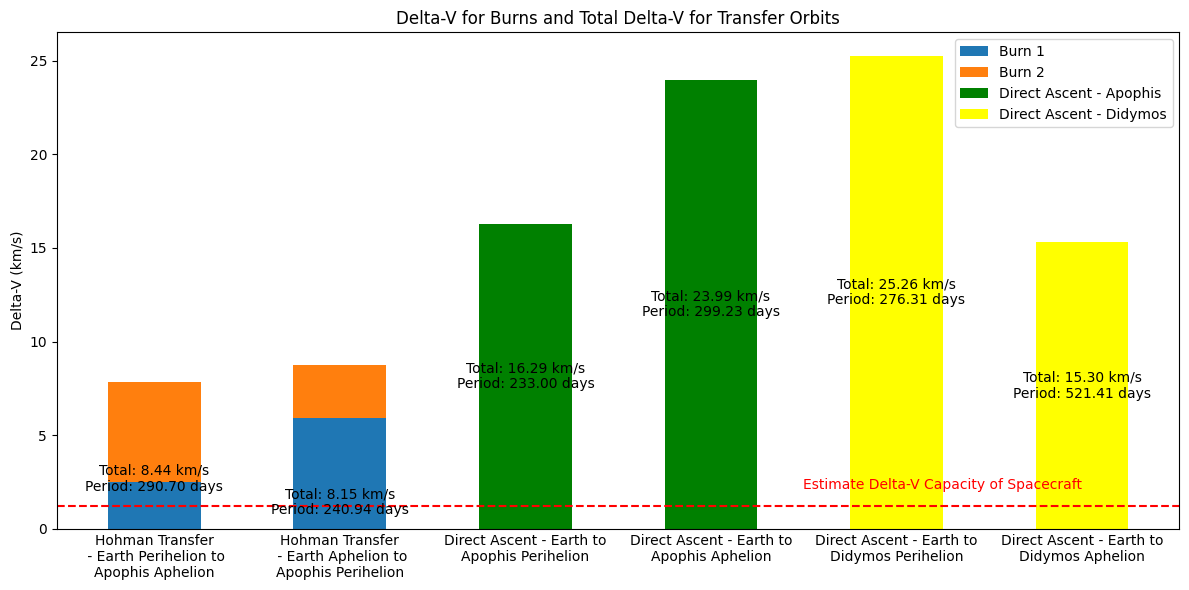

In [33]:
# Delta-V for the burns and total Delta-V
burns_dv1 = [dv1, dv2]
burns_dv2 = [dv3, dv4]
total_dv = [total_dv1, total_dv2]

# Add direct ascent variables
burns_dv_direct_aph_apophis = [total_dv_direct_aph]
burns_dv_direct_peri_apophis = [total_dv_direct_peri]
burns_dv_direct_aph_didymos = [total_dv_direct_aph_didymos]
burns_dv_direct_peri_didymos = [total_dv_direct_peri_didymos]

total_dv_direct = [total_dv_direct_peri, total_dv_direct_aph, total_dv_direct_peri_didymos, total_dv_direct_aph_didymos]

periods = [T1, T2]
# Add periods for direct ascent
periods_direct = [T_direct_peri_apophis, T_direct_aph_apophis, T_direct_peri_didymos, T_direct_aph_didymos]

labels = ['Hohman Transfer\n - Earth Perihelion to\nApophis Aphelion', 
          'Hohman Transfer\n - Earth Aphelion to\nApophis Perihelion', 
          'Direct Ascent - Earth to\nApophis Perihelion',
          'Direct Ascent - Earth to\nApophis Aphelion',
          'Direct Ascent - Earth to\nDidymos Perihelion',
          'Direct Ascent - Earth to\nDidymos Aphelion']

x = np.arange(len(labels))  # Adjusted the label locations to make bars appear closer
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot with stacked bars for each burn
rects1 = ax.bar(x[0:2], burns_dv1, width, label='Burn 1')
rects2 = ax.bar(x[0:2], burns_dv2, width, bottom=burns_dv1, label='Burn 2')
rects3 = ax.bar(x[2:4], total_dv_direct[0:2], width, label='Direct Ascent - Apophis', color='green')
rects4 = ax.bar(x[4:], total_dv_direct[2:], width, label='Direct Ascent - Didymos', color='yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Delta-V (km/s)')
ax.set_title('Delta-V for Burns and Total Delta-V for Transfer Orbits')
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center')  # Centered labels
ax.tick_params(axis='x', which='both', length=0)  # Remove x-axis ticks
ax.legend()

# Function to attach a text label inside each bar in *rects*, displaying the period of the transfer orbit.
def autolabel(rects, total_dv, periods):
    for rect, dv, period in zip(rects, total_dv, periods):
        height = rect.get_height()
        ax.annotate('Total: {:.2f} km/s\nPeriod: {:.2f} days'.format(dv, period),
                    xy=(rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 0),  # no offset
                    textcoords="offset points",
                    ha='center', va='center')

autolabel(rects2, total_dv, periods)
autolabel(rects3, total_dv_direct[0:2], periods_direct[0:2])
autolabel(rects4, total_dv_direct[2:], periods_direct[2:])
ax.axhline(y=1.2, color='r', linestyle='--', label="Delta-V Capacity of Spacecraft")
ax.annotate('Estimate Delta-V Capacity of Spacecraft', xy=(len(labels)-1, 1.2), xytext=(0, 10), 
            textcoords="offset points", ha='right', va='bottom', color='r')


fig.tight_layout()

plt.show()


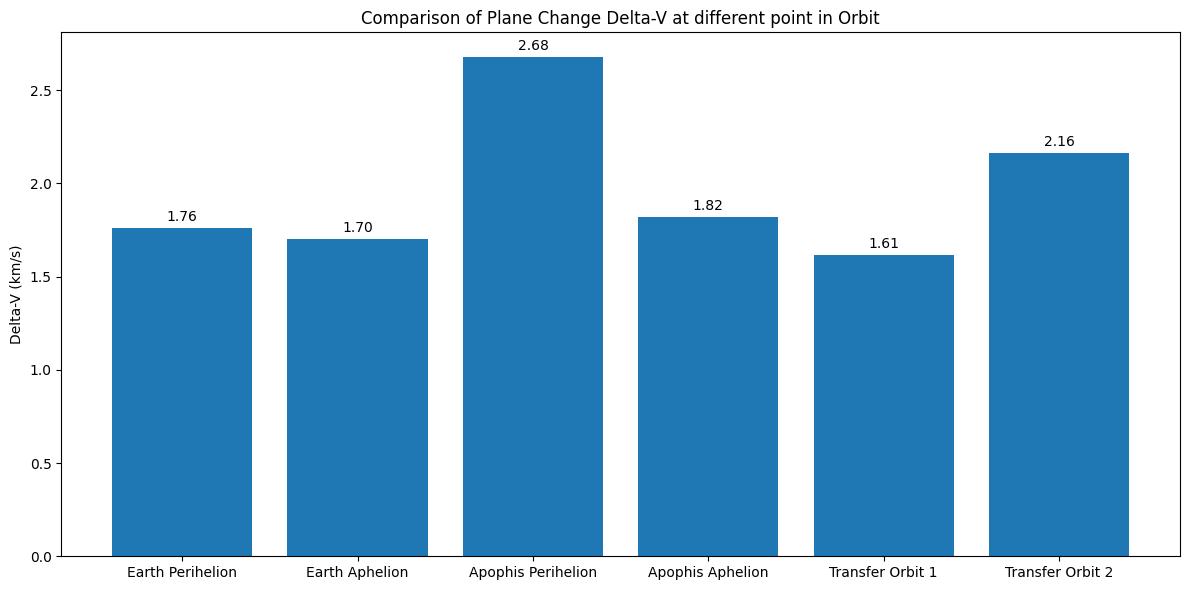

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plane changes
plane_changes = [dv_theta_earth_peri, dv_theta_earth_aph, dv_theta_apophis_peri, dv_theta_apophis_aph, dv_theta_transfer_peri, dv_theta_transfer_aph]
labels = ['Earth Perihelion', 'Earth Aphelion', 'Apophis Perihelion', 'Apophis Aphelion', 'Transfer Orbit 1', 'Transfer Orbit 2']

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot
rects1 = ax.bar(x, plane_changes)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Delta-V (km/s)')
ax.set_title('Comparison of Plane Change Delta-V at different point in Orbit')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Function to attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()


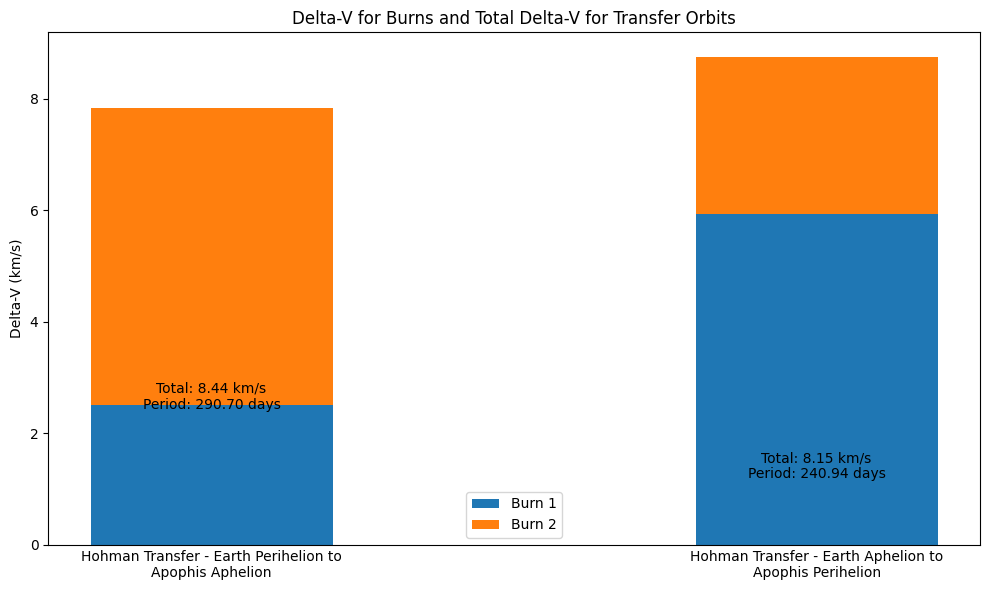

In [10]:

# Delta-V for the burns and total Delta-V
burns_dv1 = [dv1, dv2]
burns_dv2 = [dv3, dv4]
total_dv = [total_dv1, total_dv2]
periods = [T1,T2]
labels = ['Hohman Transfer - Earth Perihelion to\nApophis Aphelion', 'Hohman Transfer - Earth Aphelion to\nApophis Perihelion']

x = np.array([0,0.5])  # Adjusted the label locations to make bars appear closer
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot with stacked bars for each burn
rects1 = ax.bar(x, burns_dv1, width, label='Burn 1')
rects2 = ax.bar(x, burns_dv2, width, bottom=burns_dv1, label='Burn 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Delta-V (km/s)')
ax.set_title('Delta-V for Burns and Total Delta-V for Transfer Orbits')
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center')  # Centered labels
ax.tick_params(axis='x', which='both', length=0)  # Remove x-axis ticks
ax.legend(loc='lower center')

# Function to attach a text label inside each bar in *rects*, displaying the period of the transfer orbit.
def autolabel(rects, total_dv, periods):
    for rect, dv, period in zip(rects, total_dv, periods):
        height = rect.get_height()
        ax.annotate('Total: {:.2f} km/s\nPeriod: {:.2f} days'.format(dv, period),
                    xy=(rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 0),  # no offset
                    textcoords="offset points",
                    ha='center', va='center')

autolabel(rects2, total_dv, periods)


fig.tight_layout()

plt.show()





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


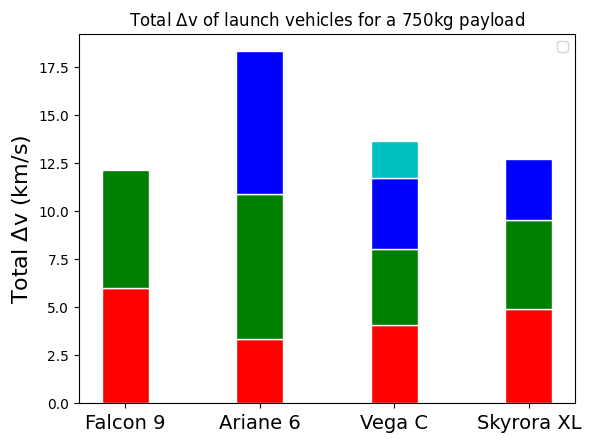

The total $\Delta$v for Falcon 9 is 12.14 km/s.
The total $\Delta$v for Ariane 6 is 18.33 km/s.
The total $\Delta$v for Vega C is 13.66 km/s.
The total $\Delta$v for Skyrora XL is 12.71 km/s.


In [11]:
import matplotlib.pyplot as plt
import numpy as np


# Constants
g_0 = 9.81  # m/s²

I_sp_values = {
    'LOX/RP-1': 310,  # seconds
    'LOX/RP-2': 380,  # seconds
    'Solid': 250,  # seconds
    'LOX/LH2': 450,  # seconds
    'UDMH / N2O4': 325  # seconds
}

rockets = [falcon9, ariane6, vega_c]
rocket_names = ['Falcon 9', 'Ariane 6', 'Vega C']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

I_sp_values['HTP / KEROSENE'] = 320

rockets.append(Skyrora_XL)
rocket_names.append('Skyrora XL')
colors.append('y')

payload_mass = 750  # kg

fig, ax = plt.subplots()

# Create a dictionary to store the total delta-v for each rocket
total_deltas = {}
delta_vs_per_rocket = {name: [] for name in rocket_names}

for i, rocket in enumerate(rockets):
    stages = list(rocket.keys())
    total_delta_v = 0
    delta_vs = []

    for j, stage in enumerate(stages):
        propellant = rocket[stage]['Propellant']
        I_sp = I_sp_values[propellant]
        remaining_mass = payload_mass + sum([rocket[s]['Dry Mass'] * 1000 for s in stages[j:]])
        m_i = (rocket[stage]['Mass (propellant)'] + rocket[stage]['Dry Mass']) * 1000 + remaining_mass  # kg
        m_f = remaining_mass + rocket[stage]['Dry Mass'] * 1000  # kg
        delta_v = I_sp * g_0 * np.log(m_i/m_f)  # m/s
        total_delta_v += delta_v
        delta_vs.append(delta_v / 1000)

    # Store the total delta-v in the dictionary
    total_deltas[rocket_names[i]] = total_delta_v
    delta_vs_per_rocket[rocket_names[i]] = delta_vs

# Create stacked bar chart
bar_width = 0.35
for i, (rocket_name, delta_vs) in enumerate(delta_vs_per_rocket.items()):
    bottom = 0
    for j, delta_v in enumerate(delta_vs):
        ax.bar(i, delta_v, bottom=bottom, color=colors[j % len(colors)], edgecolor='white', width=bar_width)
        bottom += delta_v

ax.set_ylabel('Total $\Delta$v (km/s)', fontsize = 16)
ax.set_xticks(np.arange(len(rockets)))
ax.set_xticklabels(rocket_names, fontsize = 14)
ax.legend()
plt.title('Total $\Delta$v of launch vehicles for a 750kg payload' )
plt.show()

# Print the total delta-v for each rocket
for rocket_name, total_delta_v in total_deltas.items():
    print(f"The total $\Delta$v for {rocket_name} is {total_delta_v/1000:.2f} km/s.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


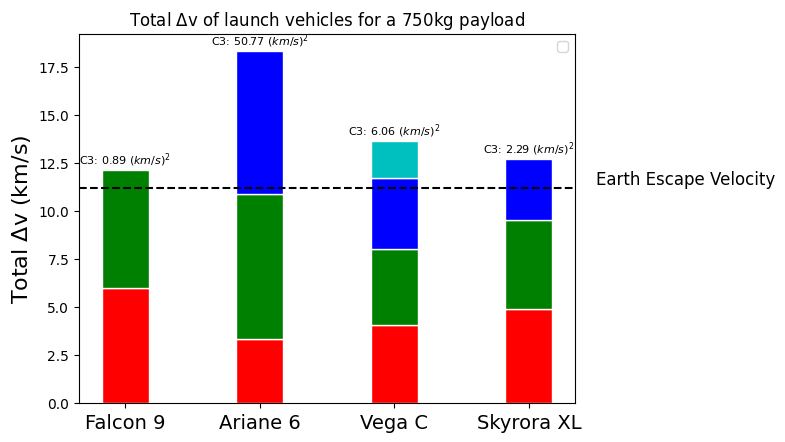

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
g_0 = 9.81  # m/s²
earth_escape_velocity = 11.2  # km/s

I_sp_values = {
    'LOX/RP-1': 310,  # seconds
    'LOX/RP-2': 380,  # seconds
    'Solid': 250,  # seconds
    'LOX/LH2': 450,  # seconds
    'UDMH / N2O4': 325,  # seconds
    'HTP / KEROSENE':320
}


rockets = [falcon9, ariane6, vega_c, Skyrora_XL]
rocket_names = ['Falcon 9', 'Ariane 6', 'Vega C', 'Skyrora XL']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

payload_mass = 750  # kg

fig, ax = plt.subplots()

# Create a dictionary to store the total delta-v for each rocket
total_deltas = {}
delta_vs_per_rocket = {name: [] for name in rocket_names}
c3_values = {}

for i, rocket in enumerate(rockets):
    stages = list(rocket.keys())
    total_delta_v = 0
    delta_vs = []

    for j, stage in enumerate(stages):
        propellant = rocket[stage]['Propellant']
        I_sp = I_sp_values[propellant]
        remaining_mass = payload_mass + sum([rocket[s]['Dry Mass'] * 1000 for s in stages[j:]])
        m_i = (rocket[stage]['Mass (propellant)'] + rocket[stage]['Dry Mass']) * 1000 + remaining_mass  # kg
        m_f = remaining_mass + rocket[stage]['Dry Mass'] * 1000  # kg
        delta_v = I_sp * g_0 * np.log(m_i/m_f)  # m/s
        total_delta_v += delta_v
        delta_vs.append(delta_v / 1000)

    total_deltas[rocket_names[i]] = total_delta_v
    delta_vs_per_rocket[rocket_names[i]] = delta_vs
    
    # Calculate C3
    v_excess = total_delta_v/1000 - earth_escape_velocity
    c3_values[rocket_names[i]] = v_excess**2

# Create stacked bar chart
bar_width = 0.35
for i, (rocket_name, delta_vs) in enumerate(delta_vs_per_rocket.items()):
    bottom = 0
    for j, delta_v in enumerate(delta_vs):
        bar = ax.bar(i, delta_v, bottom=bottom, color=colors[j % len(colors)], edgecolor='white', width=bar_width)
        bottom += delta_v
    # Add C3 value on top of each bar
    height = bottom
    ax.text(i, height + 0.1, f"C3: {c3_values[rocket_name]:.2f} $(km/s)^2$", ha='center', va='bottom', fontsize=8)

# Add Earth escape velocity as a dotted line
ax.axhline(earth_escape_velocity, linestyle='--', color='black')
ax.text(len(rockets)-0.5, earth_escape_velocity + 0.2, 'Earth Escape Velocity', color='black', fontsize=12)

ax.set_ylabel('Total $\Delta$v (km/s)', fontsize = 16)
ax.set_xticks(np.arange(len(rockets)))
ax.set_xticklabels(rocket_names, fontsize = 14)
ax.legend()
plt.title('Total $\Delta$v of launch vehicles for a 750kg payload')
plt.show()



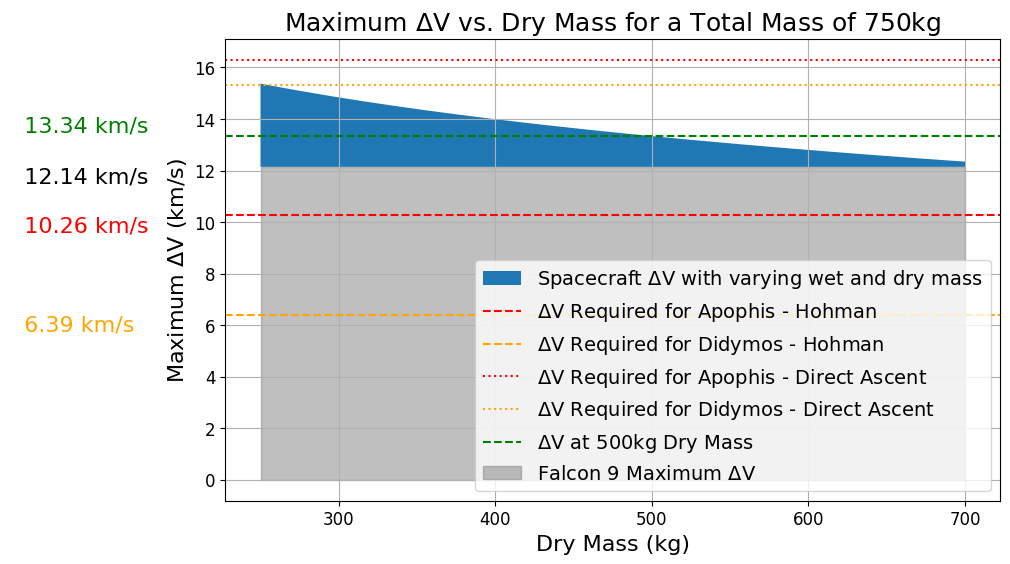

In [13]:
#plotting the maximum delta v while varying spacecraft mass
falcon9dv = total_deltas['Falcon 9']/1000
total_mass = 750
dry_masses = np.linspace(250, 700, 500)
wet_masses = total_mass 
max_delta_vs = np.empty_like(dry_masses)

# Compute the maximum delta-v for each pair of dry and wet mass values
M0 = wet_masses
for i in range(dry_masses.size):
    
    MF = dry_masses[i]
    ve = ISP * G0
    delta_v_max = ve * math.log(M0 / MF) / 1000
    max_delta_vs[i] = delta_v_max + falcon9dv

dry_mass_500kg = 500
index_500kg = np.argmin(np.abs(dry_masses - dry_mass_500kg))  # Get the index of the closest value to 500kg
delta_v_500kg = max_delta_vs[index_500kg]


# Create a plot of maximum delta-v vs. dry mass
plt.figure(figsize=(10, 6))
plt.fill_between(dry_masses, falcon9dv, max_delta_vs, label = 'Spacecraft $\Delta$V with varying wet and dry mass')
plt.axhline(total_dv_apop, color='r', linestyle='--', label='$\Delta$V Required for Apophis - Hohman')
plt.axhline(total_dv_didy, color='orange', linestyle='--', label='$\Delta$V Required for Didymos - Hohman')
plt.axhline(16.3, color='r', linestyle=':', label='$\Delta$V Required for Apophis - Direct Ascent')
plt.axhline(15.3, color='orange', linestyle=':', label='$\Delta$V Required for Didymos - Direct Ascent')
plt.axhline(delta_v_500kg, color='green', linestyle='--', label='$\Delta$V at 500kg Dry Mass')
plt.fill_between(dry_masses, 0, falcon9dv, color='grey', alpha=0.5, label='Falcon 9 Maximum $\Delta$V')
plt.xlabel('Dry Mass (kg)', fontsize=16)
plt.ylabel('Maximum $\Delta$V (km/s)', fontsize=16)
plt.title('Maximum $\Delta$V vs. Dry Mass for a Total Mass of 750kg',fontsize=18)
plt.grid(True, which = 'both')

plt.text(90, total_dv_apop, f'  {total_dv_apop:.2f} km/s', verticalalignment='top', color='r', fontsize=16)
plt.text(90, total_dv_didy, f'  {total_dv_didy:.2f} km/s', verticalalignment='top', color='orange', fontsize=16)
plt.text(90, falcon9dv, f'  {falcon9dv:.2f} km/s', verticalalignment='top', color='black', fontsize=16)
plt.text(90, delta_v_500kg, f'  {delta_v_500kg:.2f} km/s', verticalalignment='bottom', color='green', fontsize=16)  # Add text for the new line

plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='lower right', fontsize = 14)
plt.show()


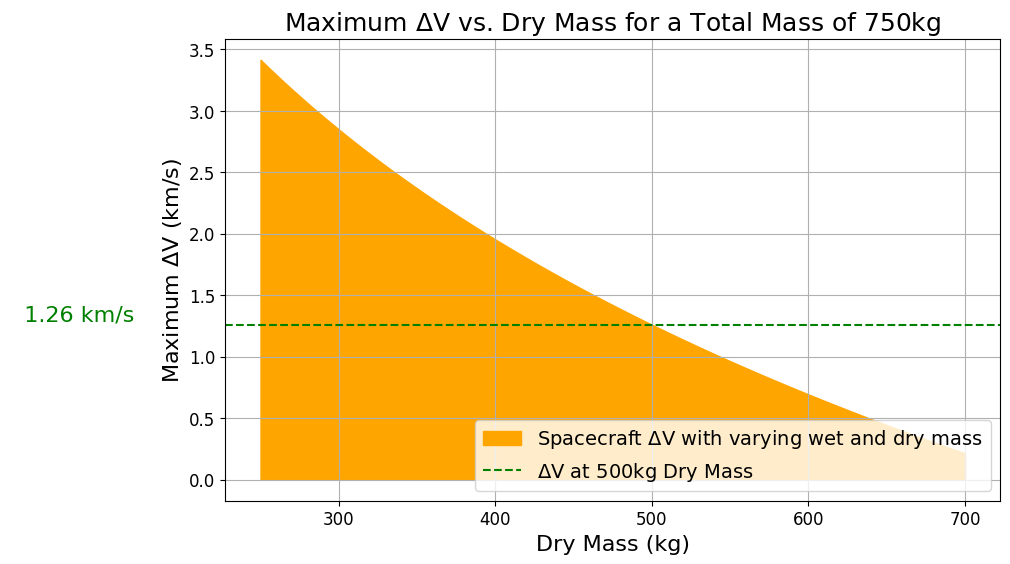

In [40]:
#plotting the maximum delta v while varying spacecraft mass
total_mass = 750
dry_masses = np.linspace(250, 700, 500)
wet_masses = total_mass 
max_delta_vs = np.empty_like(dry_masses)
ISP = 317
# Compute the maximum delta-v for each pair of dry and wet mass values
M0 = wet_masses
for i in range(dry_masses.size):
    
    MF = dry_masses[i]
    ve = ISP * G0
    delta_v_max = ve * math.log(M0 / MF) / 1000
    max_delta_vs[i] = delta_v_max

dry_mass_500kg = 500
index_500kg = np.argmin(np.abs(dry_masses - dry_mass_500kg))  # Get the index of the closest value to 500kg
delta_v_500kg = max_delta_vs[index_500kg]


# Create a plot of maximum delta-v vs. dry mass
plt.figure(figsize=(10, 6))
plt.fill_between(dry_masses, 0, max_delta_vs, color = 'orange', label = 'Spacecraft $\Delta$V with varying wet and dry mass')
plt.axhline(delta_v_500kg, color='green', linestyle='--', label='$\Delta$V at 500kg Dry Mass')
plt.xlabel('Dry Mass (kg)', fontsize=16)
plt.ylabel('Maximum $\Delta$V (km/s)', fontsize=16)
plt.title('Maximum $\Delta$V vs. Dry Mass for a Total Mass of 750kg',fontsize=18)
plt.grid(True, which = 'both')
plt.text(90, delta_v_500kg, f'  {delta_v_500kg:.2f} km/s', verticalalignment='bottom', color='green', fontsize=16)  # Add text for the new line

plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='lower right', fontsize = 14)
plt.show()

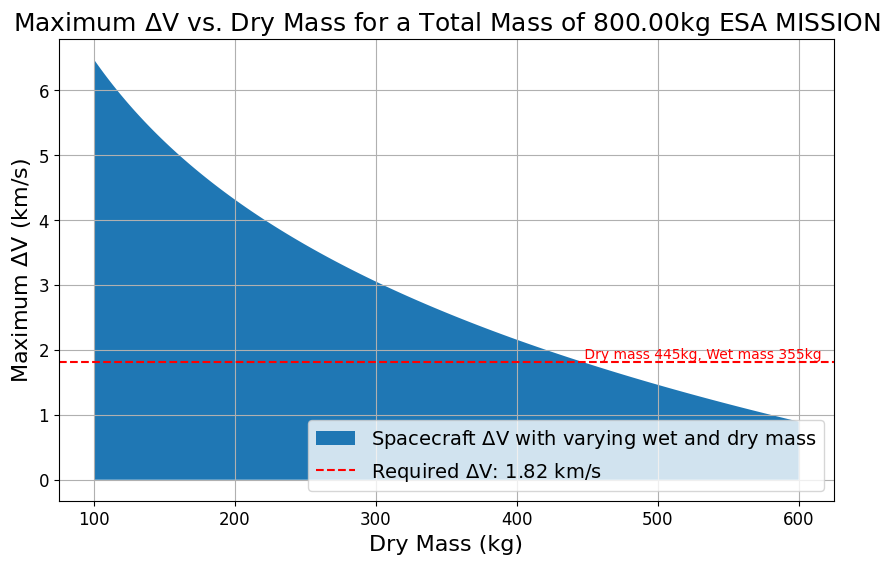

In [35]:

import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
G0 = 9.81  # gravitational acceleration in m/s^2
total_mass = 800
# Given delta-v value
given_delta_v = 1.82  # Example value, you can replace this with your value

# Compute the maximum delta-v for each dry mass
M0 = total_mass
for i in range(dry_masses.size):
    MF = dry_masses[i]
    ve = ISP * G0
    delta_v_max = ve * math.log(M0 / MF) / 1000
    max_delta_vs[i] = delta_v_max

# Finding indices where max_delta_vs is just above and just below the given delta-v value
indices = np.where((np.diff(np.sign(given_delta_v - max_delta_vs)) != 0))[0]

# If there's an exact match, only one index is needed
if given_delta_v in max_delta_vs:
    indices = [np.where(max_delta_vs == given_delta_v)[0][0]]

# Extract corresponding dry mass values
mass_values_for_given_delta_v = dry_masses[indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(dry_masses, 0, max_delta_vs, label='Spacecraft $\Delta$V with varying wet and dry mass')
plt.axhline(given_delta_v, color='red', linestyle='--', label=f'Required $\Delta$V: {given_delta_v} km/s')

# Annotate mass values
for mass in mass_values_for_given_delta_v:
    plt.text(mass, given_delta_v, f' Dry mass {mass:.0f}kg, Wet mass {total_mass-mass:.0f}kg', verticalalignment='bottom', color='red', fontsize=10)

plt.xlabel('Dry Mass (kg)', fontsize=16)
plt.ylabel('Maximum $\Delta$V (km/s)', fontsize=16)
plt.title(f'Maximum $\Delta$V vs. Dry Mass for a Total Mass of {total_mass:.2f}kg ESA MISSION', fontsize=18)
plt.grid(True, which='both')
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='lower right', fontsize=14)
plt.show()

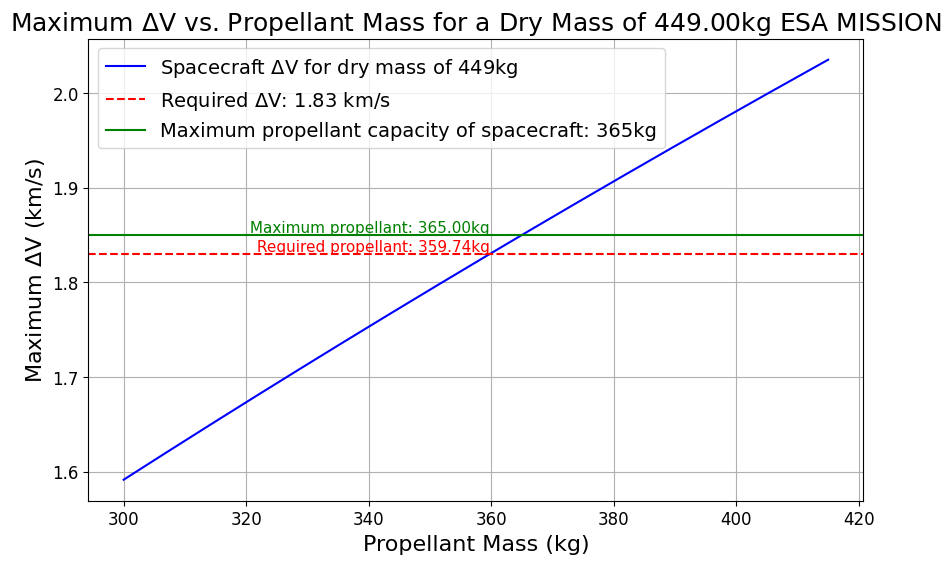

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
G0 = 9.81  # gravitational acceleration in m/s^2
ISP = 317  # Example value for the specific impulse, replace as needed
dry_mass = 449  # kg
max_propellant_mass = 365  # kg
given_delta_v = 1.83  # Example value, replace this with your desired delta-v value

# Create an array for propellant masses
propellant_masses = np.linspace(300, max_propellant_mass + 50, 1000)  # I've extended it by 50 kg for visualization purposes
total_masses = dry_mass + propellant_masses

# Compute the delta-v for each total mass value
delta_vs = []
for M in total_masses:
    MF = dry_mass
    ve = ISP * G0
    delta_v = ve * math.log(M / MF) / 1000
    delta_vs.append(delta_v)

# Finding the propellant mass where delta_vs is closest to the given delta-v value
idx = (np.abs(np.array(delta_vs) - given_delta_v)).argmin()

required_propellant_mass = propellant_masses[idx]
M2 = dry_mass + 365
ve2 = ISP * G0
exact_delta_v2 = ve * math.log(M2 / dry_mass) / 1000
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(propellant_masses, delta_vs, label=f'Spacecraft $\Delta$V for dry mass of {dry_mass}kg', color='blue')
plt.axhline(given_delta_v, color='red', linestyle='--', label=f'Required $\Delta$V: {given_delta_v} km/s')
plt.axhline(exact_delta_v2, color='green', linestyle='-', label=f'Maximum propellant capacity of spacecraft: {max_propellant_mass}kg')
plt.text(required_propellant_mass, given_delta_v, f' Required propellant: {required_propellant_mass:.2f}kg', verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=11)
plt.text(required_propellant_mass, exact_delta_v2, f' Maximum propellant: 365.00kg', verticalalignment='bottom', horizontalalignment='right', color='green', fontsize=11)


plt.xlabel('Propellant Mass (kg)', fontsize=16)
plt.ylabel('Maximum $\Delta$V (km/s)', fontsize=16)
plt.title(f'Maximum $\Delta$V vs. Propellant Mass for a Dry Mass of {dry_mass:.2f}kg ESA MISSION', fontsize=18)
plt.grid(True, which='both')
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='upper left', fontsize=14)
plt.show()



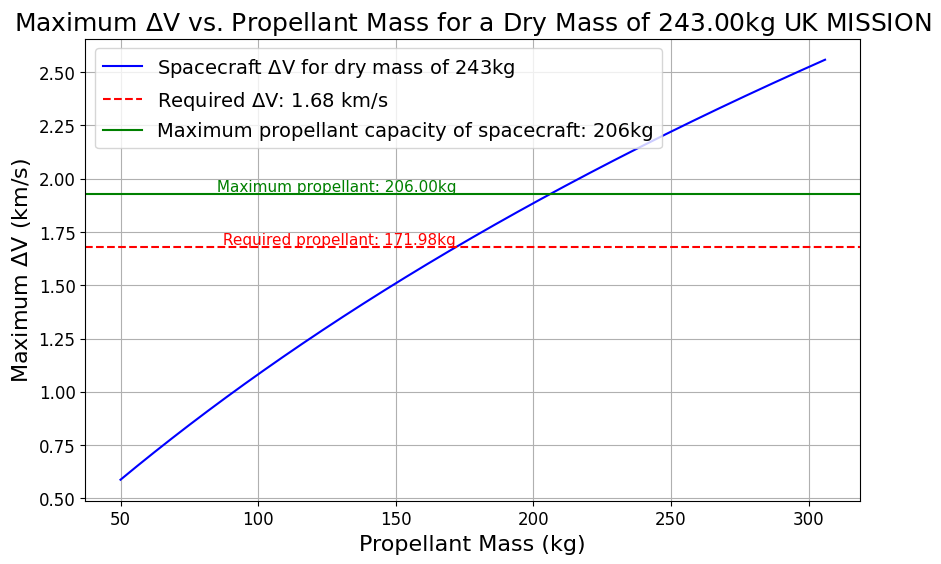

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
G0 = 9.81  # gravitational acceleration in m/s^2
ISP = 320  # Example value for the specific impulse, replace as needed
dry_mass = 243  # kg
max_propellant_mass = 206  # kg
given_delta_v = 1.68  # Example value, replace this with your desired delta-v value

# Create an array for propellant masses
propellant_masses = np.linspace(50, max_propellant_mass + 100, 1000)  # I've extended it by 50 kg for visualization purposes
total_masses = dry_mass + propellant_masses

# Compute the delta-v for each total mass value
delta_vs = []
for M in total_masses:
    MF = dry_mass
    ve = ISP * G0
    delta_v = ve * math.log(M / MF) / 1000
    delta_vs.append(delta_v)

# Finding the propellant mass where delta_vs is closest to the given delta-v value
idx = (np.abs(np.array(delta_vs) - given_delta_v)).argmin()

required_propellant_mass = propellant_masses[idx]
M2 = dry_mass + 206
ve2 = ISP * G0
exact_delta_v2 = ve * math.log(M2 / dry_mass) / 1000
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(propellant_masses, delta_vs, label=f'Spacecraft $\Delta$V for dry mass of {dry_mass}kg', color='blue')
plt.axhline(given_delta_v, color='red', linestyle='--', label=f'Required $\Delta$V: {given_delta_v} km/s')
plt.axhline(exact_delta_v2, color='green', linestyle='-', label=f'Maximum propellant capacity of spacecraft: {max_propellant_mass}kg')
plt.text(required_propellant_mass, given_delta_v, f' Required propellant: {required_propellant_mass:.2f}kg', verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=11)
plt.text(required_propellant_mass, exact_delta_v2, f' Maximum propellant: 206.00kg', verticalalignment='bottom', horizontalalignment='right', color='green', fontsize=11)


plt.xlabel('Propellant Mass (kg)', fontsize=16)
plt.ylabel('Maximum $\Delta$V (km/s)', fontsize=16)
plt.title(f'Maximum $\Delta$V vs. Propellant Mass for a Dry Mass of {dry_mass:.2f}kg UK MISSION', fontsize=18)
plt.grid(True, which='both')
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='upper left', fontsize=14)
plt.show()

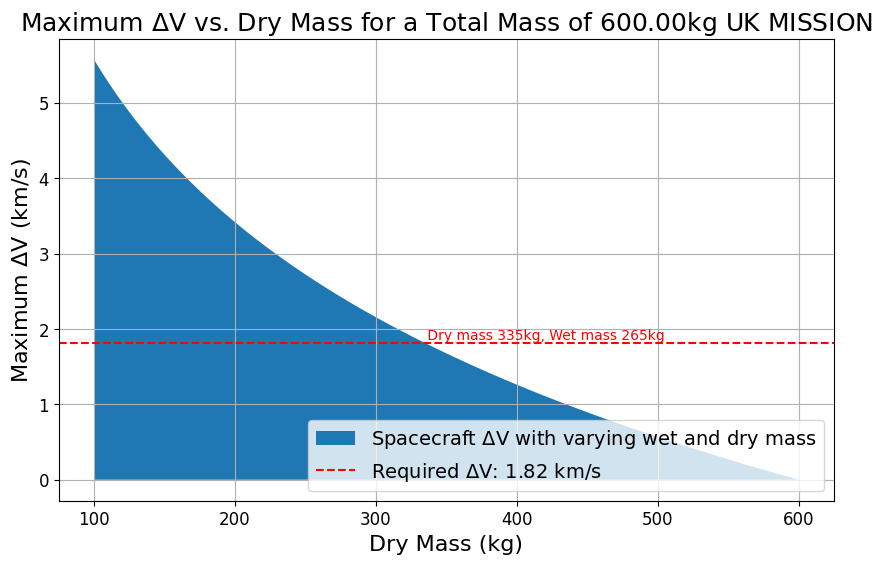

In [34]:

import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
G0 = 9.81  # gravitational acceleration in m/s^2
total_mass = 600
# Given delta-v value
given_delta_v = 1.82  # Example value, you can replace this with your value
dry_masses = np.linspace(100, 600, 500)
# Compute the maximum delta-v for each dry mass
M0 = total_mass
for i in range(dry_masses.size):
    MF = dry_masses[i]
    ve = ISP * G0
    delta_v_max = ve * math.log(M0 / MF) / 1000
    max_delta_vs[i] = delta_v_max

# Finding indices where max_delta_vs is just above and just below the given delta-v value
indices = np.where((np.diff(np.sign(given_delta_v - max_delta_vs)) != 0))[0]

# If there's an exact match, only one index is needed
if given_delta_v in max_delta_vs:
    indices = [np.where(max_delta_vs == given_delta_v)[0][0]]

# Extract corresponding dry mass values
mass_values_for_given_delta_v = dry_masses[indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(dry_masses, 0, max_delta_vs, label='Spacecraft $\Delta$V with varying wet and dry mass')
plt.axhline(given_delta_v, color='red', linestyle='--', label=f'Required $\Delta$V: {given_delta_v} km/s')

# Annotate mass values
for mass in mass_values_for_given_delta_v:
    plt.text(mass, given_delta_v, f' Dry mass 335kg, Wet mass 265kg', verticalalignment='bottom', color='red', fontsize=10)

plt.xlabel('Dry Mass (kg)', fontsize=16)
plt.ylabel('Maximum $\Delta$V (km/s)', fontsize=16)
plt.title(f'Maximum $\Delta$V vs. Dry Mass for a Total Mass of {total_mass:.2f}kg UK MISSION', fontsize=18)
plt.grid(True, which='both')
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='lower right', fontsize=14)
plt.show()

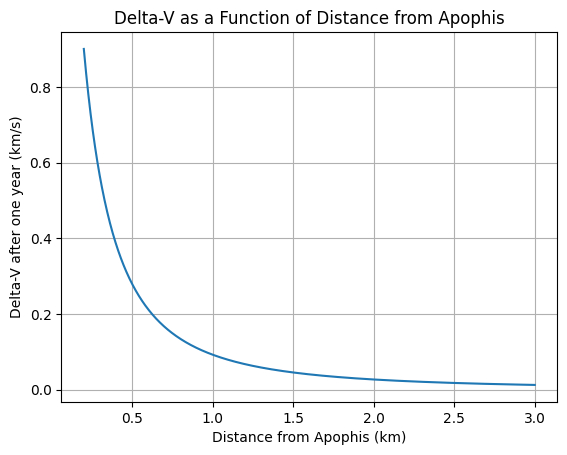

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
mass_apophis = 6.1e10  # mass of Apophis in kg
density_apophis = 2600  # density of Apophis in kg/m^3
t = 60 * 60 * 24 * 365  # time in seconds (one year)

# Calculate radius of Apophis
radius_apophis = ((3 * mass_apophis) / (4 * np.pi * density_apophis))**(1/3)

# Calculate delta-v at distances from 0.2km to 6km away
distances_km = np.linspace(0.2, 3, 1000)  # distances in km
distances_m = distances_km * 1e3  # convert distances to m
accelerations = G * mass_apophis / (radius_apophis + distances_m)**2
delta_vs = accelerations * t/1000

# Create figure and plot
plt.figure()
plt.plot(distances_km, delta_vs)
plt.xlabel('Distance from Apophis (km)')
plt.ylabel('Delta-V after one year (km/s)')
plt.title('Delta-V as a Function of Distance from Apophis')
plt.grid(True)

# Show the plot
plt.show()



In [19]:
##How fast would you need to go around apophis to enter a stable orbit
import math

def orbital_velocity(mass, radius):
    """Calculate the orbital velocity needed for a stable orbit around a celestial body."""
    G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
    return math.sqrt(G * mass / radius)

# Apophis parameters
mass_apophis = 4.6e10  # kg
radius_apophis = 185  # m
altitude = 5000  # m, this is an arbitrary chosen altitude above Apophis's surface

v = orbital_velocity(mass_apophis, radius_apophis + altitude)
print(f"Orbital velocity required for a stable orbit {altitude}m above Apophis's surface: {v:.2f} m/s")


Orbital velocity required for a stable orbit 5000m above Apophis's surface: 0.02 m/s


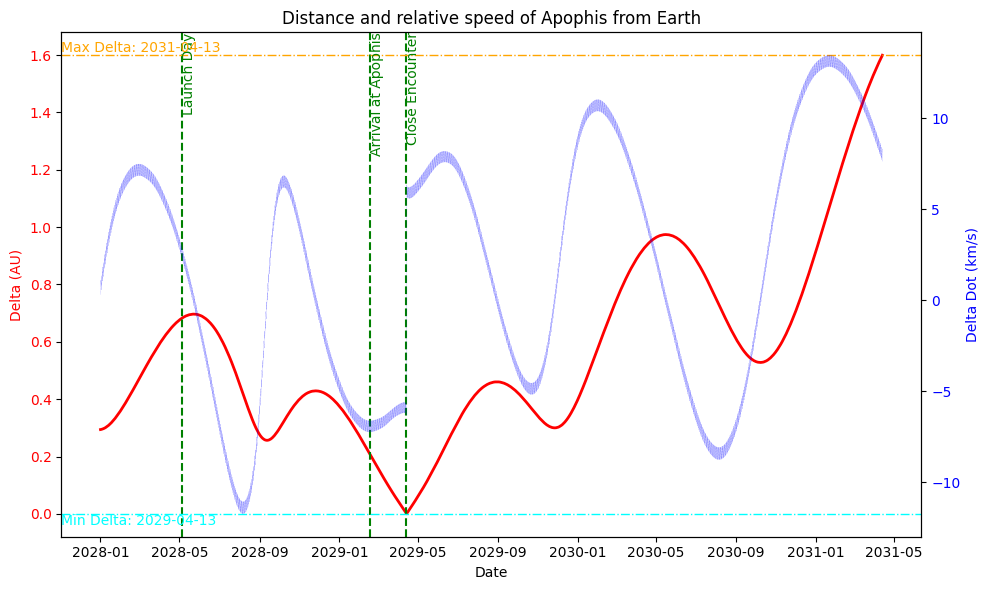

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the text file
data = pd.read_csv(r'C:\Users\Ed\OneDrive - University College London\Apophis\horizons data final\horizons_results_from_earth.txt', skipinitialspace=True, delimiter=',')
# Convert the 'Date' column to datetime format
data['Date__(UT)__HR:MN'] = pd.to_datetime(data['Date__(UT)__HR:MN'])

# Extracting the 'Date', 'delta' and 'deldot' columns
dates = data['Date__(UT)__HR:MN']
delta = data['delta']
deldot = data['deldot']

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting delta with a solid red line on the primary y-axis
ax1.plot(dates, delta, 'r-', label='Delta', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Delta (AU)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a secondary y-axis for the deldot data
ax2 = ax1.twinx()
# Plotting delta dot with a thinner blue dotted line on the secondary y-axis
ax2.plot(dates, deldot, 'b--', label='Delta Dot', linewidth=0.1)
ax2.set_ylabel('Delta Dot (km/s)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add green vertical lines for the specific mission dates
mission_dates = ['2028-05-05', '2029-02-17', '2029-04-13']
labels = ['Launch Day', 'Arrival at Apophis', 'Close Encounter']


for date, label in zip(mission_dates, labels):
    ax1.axvline(pd.to_datetime(date), color='green', linestyle='--', linewidth=1.5)
    ax1.text(pd.to_datetime(date), ax1.get_ylim()[1], label, rotation=90, verticalalignment='top', color='green')

# Highlight max and min delta values
max_delta = delta.max()
min_delta = delta.min()
max_date = dates[delta.idxmax()]
min_date = dates[delta.idxmin()]

ax1.axhline(max_delta, color='orange', linestyle='-.', linewidth=1)
ax1.text(ax1.get_xlim()[0], max_delta, f"Max Delta: {max_date.date()}", color='orange', verticalalignment='bottom')

ax1.axhline(min_delta, color='cyan', linestyle='-.', linewidth=1)
ax1.text(ax1.get_xlim()[0], min_delta, f"Min Delta: {min_date.date()}", color='cyan', verticalalignment='top')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.title('Distance and relative speed of Apophis from Earth')
fig.tight_layout()  # This ensures that the labels and titles do not overlap
plt.show()

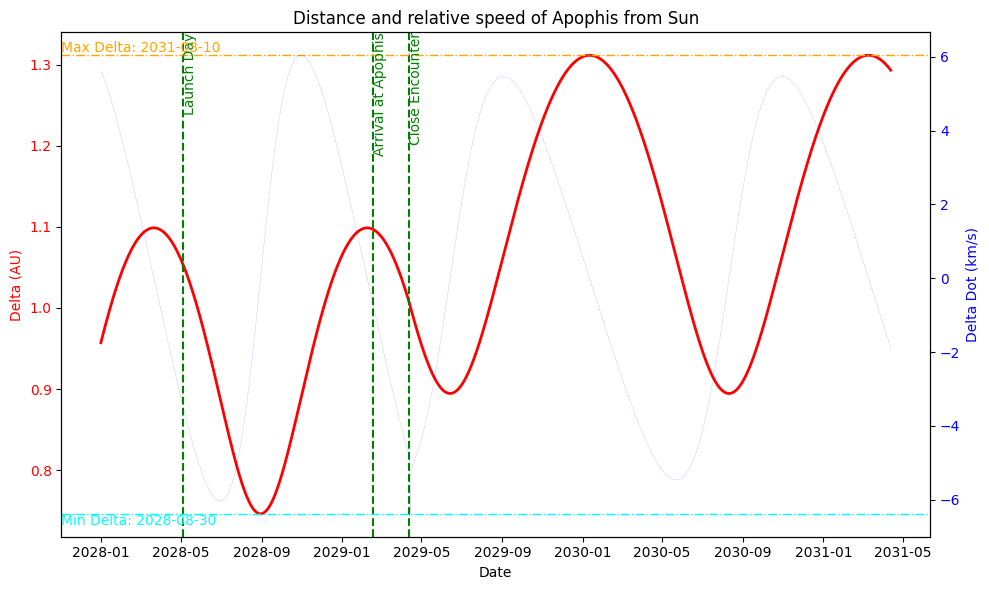

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the text file
data = pd.read_csv(r'C:\Users\Ed\OneDrive - University College London\Apophis\horizons data final\horizons_results_from_sun.txt', skipinitialspace=True, delimiter=',')
# Convert the 'Date' column to datetime format
data['Date__(UT)__HR:MN'] = pd.to_datetime(data['Date__(UT)__HR:MN'])

# Extracting the 'Date', 'delta' and 'deldot' columns
dates = data['Date__(UT)__HR:MN']
delta = data['delta']
deldot = data['deldot']

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting delta with a solid red line on the primary y-axis
ax1.plot(dates, delta, 'r-', label='Delta', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Delta (AU)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a secondary y-axis for the deldot data
ax2 = ax1.twinx()
# Plotting delta dot with a thinner blue dotted line on the secondary y-axis
ax2.plot(dates, deldot, 'b--', label='Delta Dot', linewidth=0.1)
ax2.set_ylabel('Delta Dot (km/s)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add green vertical lines for the specific mission dates
mission_dates = ['2028-05-05', '2029-02-17', '2029-04-13']
labels = ['Launch Day', 'Arrival at Apophis', 'Close Encounter']

for date, label in zip(mission_dates, labels):
    ax1.axvline(pd.to_datetime(date), color='green', linestyle='--', linewidth=1.5)
    ax1.text(pd.to_datetime(date), ax1.get_ylim()[1], label, rotation=90, verticalalignment='top', color='green')

# Highlight max and min delta values
max_delta = delta.max()
min_delta = delta.min()
max_date = dates[delta.idxmax()]
min_date = dates[delta.idxmin()]

ax1.axhline(max_delta, color='orange', linestyle='-.', linewidth=1)
ax1.text(ax1.get_xlim()[0], max_delta, f"Max Delta: {max_date.date()}", color='orange', verticalalignment='bottom')

ax1.axhline(min_delta, color='cyan', linestyle='-.', linewidth=1)
ax1.text(ax1.get_xlim()[0], min_delta, f"Min Delta: {min_date.date()}", color='cyan', verticalalignment='top')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.title('Distance and relative speed of Apophis from Sun')
fig.tight_layout()  # This ensures that the labels and titles do not overlap
plt.show()

In [23]:
import numpy as np

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2

# Apophis parameters (Replace with your actual values)
M_apophis = 4.2e10  # Mass of Apophis, kg (Example value)

# Compute orbital velocity for a given distance
def orbital_velocity(r):
    return np.sqrt(G * M_apophis / r)

# Radial Δv calculation
def radial_dv(r1, r2):
    v1 = orbital_velocity(r1)
    v2 = orbital_velocity(r2)
    return np.abs(v1 - v2)

# Triangular Δv calculation
def triangular_dv(r):
    v = orbital_velocity(r)
    theta = np.deg2rad(120)  # 120 degrees in radians for equilateral triangle
    return 2 * v * np.sin(theta / 2)

# Testing the functions
r_initial = 1000  # Initial distance, m
r_final = 5000  # Final distance, m

delta_v_radial = radial_dv(r_initial, r_final)
delta_v_triangular = triangular_dv(r_initial)

print(f"Δv for Radial Maneuver: {delta_v_radial} m/s")
print(f"Δv for Triangular Maneuver at {r_initial} m: {delta_v_triangular} m/s")


Δv for Radial Maneuver: 0.029267448327893054 m/s
Δv for Triangular Maneuver at 1000 m: 0.0917039693797384 m/s


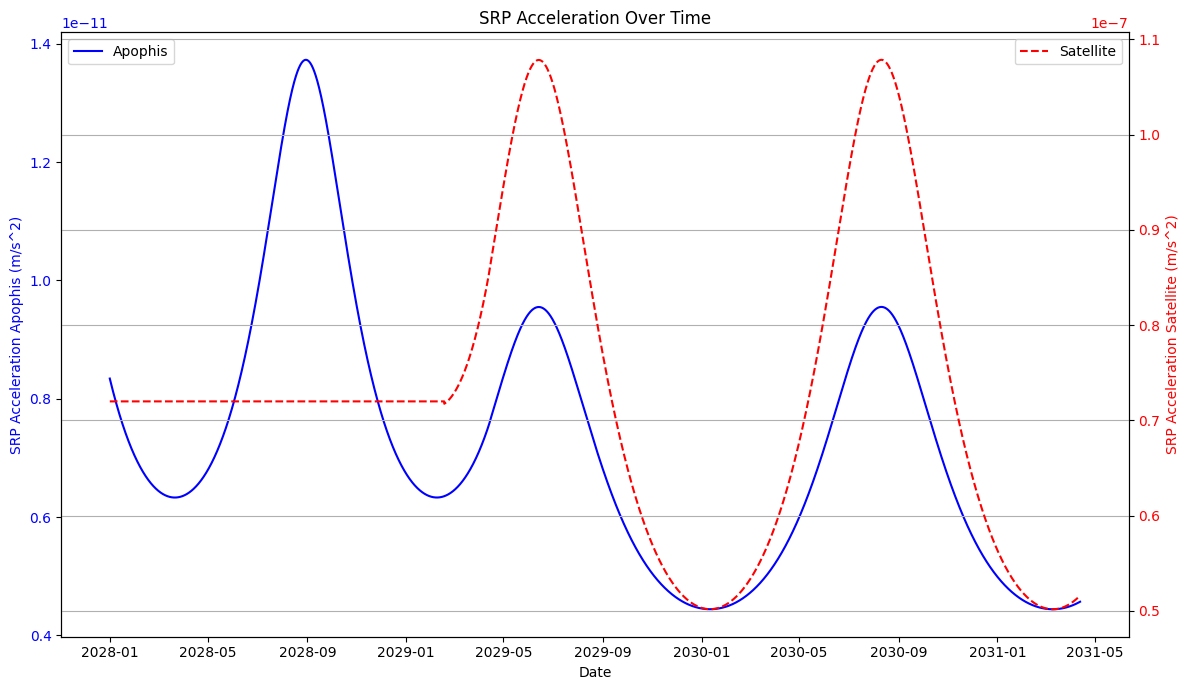

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
P_solar_1AU = 1361  # W/m^2, solar constant at 1 AU
c = 3e8  # m/s, speed of light
AU = 1.496e+11  # m, astronomical unit

# Apophis properties 
A_apophis = 0.33  # albedo
radius_apophis = 185  # m, average
Area_apophis = 140*380 # m^2, cross-sectional area
mass_apophis = 4.2e10  # kg, mass

# Satellite properties
mass_satellite = 800  # kg
#8m2 of solar array with 0.9 albedo and 1.9m2 with albedo 0.085
A_satellite = 0.9  # albedo, adjust this based on your data
Area_satellite = 8.01  # m^2, adjust this based on your data

# Load data
data = pd.read_csv(r'C:\Users\Ed\OneDrive - University College London\Apophis\horizons data final\horizons_results_from_sun.txt', skipinitialspace=True, delimiter=',')
data['Date__(UT)__HR:MN'] = pd.to_datetime(data['Date__(UT)__HR:MN'])
data2 = pd.read_csv(r'C:\Users\Ed\OneDrive - University College London\Apophis\horizons data final\horizons_results_from_earth.txt', skipinitialspace=True, delimiter=',')
data2['Date__(UT)__HR:MN'] = pd.to_datetime(data2['Date__(UT)__HR:MN'])

# Function to compute SRP acceleration for a given distance
def compute_srp_accel(D, A, Area, mass):
    P_D = P_solar_1AU * (AU/D)**2  # Adjust solar constant for distance
    a_SRP = P_D * (1 + A) * Area / (c * mass)
    return a_SRP

# Calculate SRP acceleration for Apophis
data['a_SRP_apophis'] = data['delta'].apply(lambda x: compute_srp_accel(x*AU, A_apophis, Area_apophis, mass_apophis))

# Calculate SRP acceleration for the satellite (0 before start date)
start_date = pd.to_datetime('2029-02-17')
data['a_SRP_satellite'] = data.apply(lambda row: compute_srp_accel(row['delta']*AU, A_satellite, Area_satellite, mass_satellite) if row['Date__(UT)__HR:MN'] >= start_date else 0.72e-7, axis=1)

# Plotting with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotting Apophis SRP acceleration on primary y-axis
ax1.plot(data['Date__(UT)__HR:MN'], data['a_SRP_apophis'], label='Apophis', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('SRP Acceleration Apophis (m/s^2)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create secondary y-axis for satellite SRP acceleration
ax2 = ax1.twinx()
ax2.plot(data['Date__(UT)__HR:MN'], data['a_SRP_satellite'], label='Satellite', linestyle='--', color='red')
ax2.set_ylabel('SRP Acceleration Satellite (m/s^2)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('SRP Acceleration Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


Total Δv required over the period: 7.57e+00 m/s


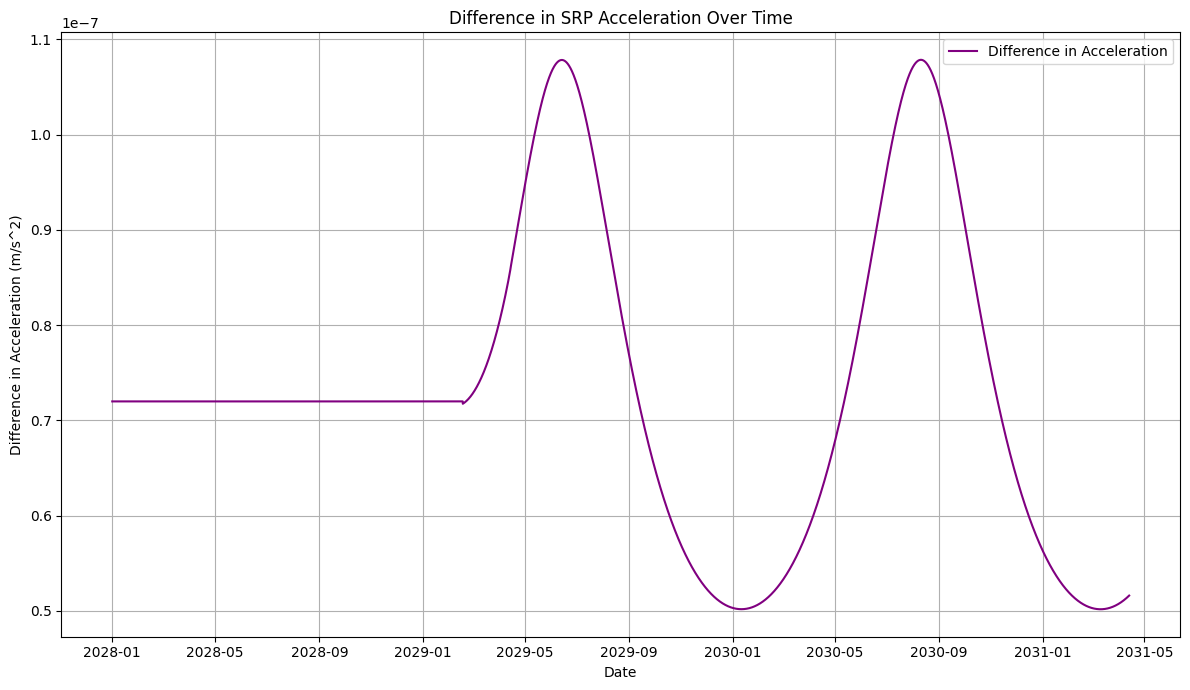

In [32]:
# Calculate the difference in accelerations
data['a_difference'] = data['a_SRP_satellite'] - data['a_SRP_apophis']

# Integrate this difference over the time window to compute Δv
delta_v = np.trapz(data['a_difference'], dx=3*3600)  # dx is time difference in seconds between consecutive data points (assuming daily data)

print(f"Total Δv required over the period: {delta_v:.2e} m/s")

# Plotting the difference in accelerations
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(data['Date__(UT)__HR:MN'], data['a_difference'], label='Difference in Acceleration', color='purple')
ax.set_xlabel('Date')
ax.set_ylabel('Difference in Acceleration (m/s^2)')
plt.title('Difference in SRP Acceleration Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


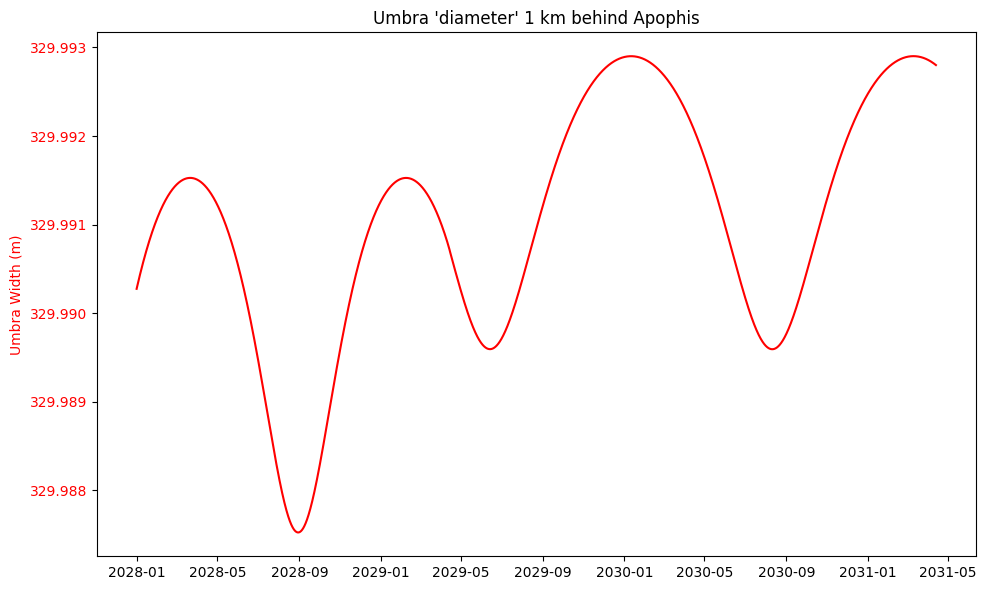

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Constants
r_sun = 696340  # km
r_apophis = 0.165  # km

# Load data
data = pd.read_csv(r'C:\Users\Ed\OneDrive - University College London\Apophis\horizons data final\horizons_results_from_sun.txt', skipinitialspace=True, delimiter=',')
data['Date__(UT)__HR:MN'] = pd.to_datetime(data['Date__(UT)__HR:MN'])
D = data['delta'] * 1.496e+11  # Convert AU to km

# Calculate umbra length
L = ((r_sun - r_apophis) / r_sun) * D - r_apophis

# Calculate umbra width 1 km behind Apophis
d = 1  # km
W = 2 * (r_apophis - r_sun * d / D) *1000

penumbra_diameter = 2 * (r_sun * d / D + r_apophis) *1000
umbra_diameter = 2 * (r_sun * d / D - r_apophis) *1000
penumbra_width = penumbra_diameter - umbra_diameter

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot umbra length
ax1.plot(data['Date__(UT)__HR:MN'], W, label="Umbra Width 1 km behind", color="red")
ax1.set_ylabel("Umbra Width (m)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))


plt.title("Umbra 'diameter' 1 km behind Apophis")
fig.tight_layout()
plt.show()



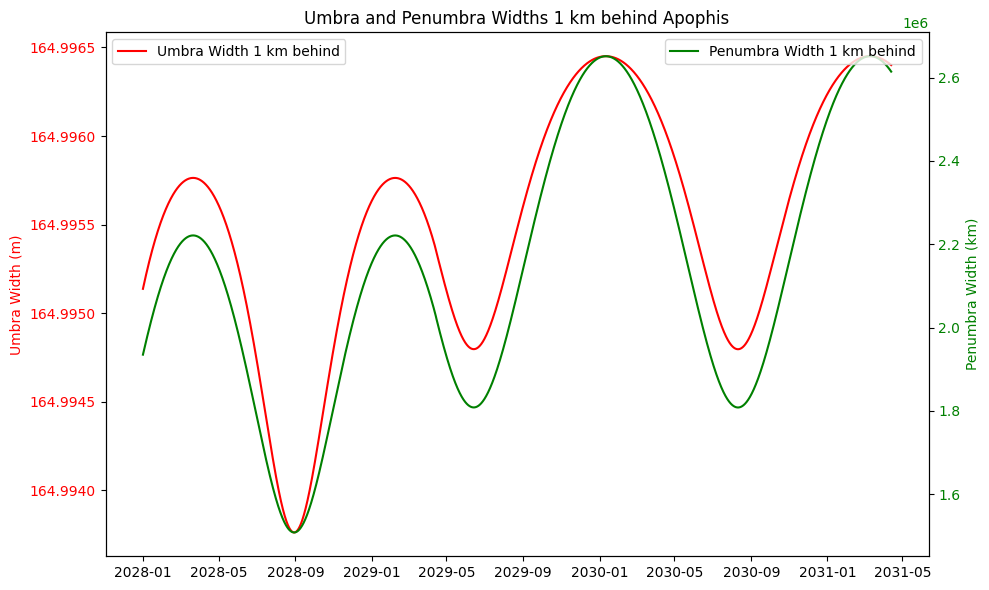

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Constants
r_sun = 696340  # km
r_apophis = 0.37  # km

# Load data
data = pd.read_csv(r'C:\Users\Ed\OneDrive - University College London\Apophis\horizons data final\horizons_results_from_sun.txt', skipinitialspace=True, delimiter=',')
data['Date__(UT)__HR:MN'] = pd.to_datetime(data['Date__(UT)__HR:MN'])
D = data['delta'] * 1.496e+11  # Convert AU to km

# Calculate umbra length
L = ((r_sun - r_apophis) / r_sun) * D - r_apophis

# Calculate umbra and penumbra widths 1 km behind Apophis
d = 100  # km

# The distance from the Sun to the point 1 km behind Apophis
D_d = D + d

# The shadow (umbra) circle radius at 1 km behind Apophis
umbra_radius_at_d = r_sun * d / D - r_apophis

# Angle of light grazing the edge of Apophis
tan_alpha = r_apophis / D

# Penumbra width at distance d
penumbra_width_at_d = d * tan_alpha * 2 * 1000  # times 2 since tan_alpha gives half the width
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot umbra width
ax1.plot(data['Date__(UT)__HR:MN'], -umbra_diameter/2, label="Umbra Width 1 km behind", color="red")
ax1.set_ylabel("Umbra Width (m)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.legend(loc="upper left")
# Create a second y-axis for the penumbra width
ax2 = ax1.twinx()
ax2.plot(data['Date__(UT)__HR:MN'], 1/penumbra_width_at_d, label="Penumbra Width 1 km behind", color="green")
ax2.set_ylabel("Penumbra Width (km)", color="green")
ax2.tick_params(axis="y", labelcolor="green")
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.legend(loc="upper right")

plt.title("Umbra and Penumbra Widths 1 km behind Apophis")
fig.tight_layout()
plt.show()
